<a href="https://colab.research.google.com/github/gawdseyi/SmsSpamDetection/blob/main/SmsSpamFilter2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
#connect to google drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
data_file = '/content/drive/MyDrive/Codes/Colab Notebooks/spamdataset.txt'


In [50]:
#load dataset
import numpy as np
import pandas as pd
import wordcloud

import os
print(os.listdir('/content/drive'))

['.shortcut-targets-by-id', '.file-revisions-by-id', 'MyDrive', '.Trash-0']


In [51]:
data_file = '/content/drive/MyDrive/Codes/Colab Notebooks/spamdataset.txt' 
data = pd.read_csv(data_file, sep=',', header=None, names=['Text','Label'] )
data.shape
data.head()


,Text,Label
Urgent! call 09061749602 from Landline. Your complimentary 4* Tenerife Holiday or £10,000 cash await collection SAE T&Cs BOX 528 HP2...,spam
+449071512431 URGENT! This is the 2nd attempt to contact U!U have WON £1250 CALL 09071512433 b4 050703 T&CsBCM4235WC1N3XX. callcost 150ppm mobilesvary. max£7. 50,spam,NaN
FREE for 1st week! No1 Nokia tone 4 ur mob every week just txt NOKIA to 8007 Get txting and tell ur mates www.getzed.co.uk POBox 36504 W45WQ norm150p/tone 16+,spam,NaN
Urgent! call 09066612661 from landline. Your complementary 4* Tenerife Holiday or £10,000 cash await collection SAE T&Cs PO Box 3 WA...,spam
WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.,spam,NaN


In [52]:
#printing all messages with label spam
df = pd.DataFrame(data) 
Spamfilter = df.loc[df['Label'] == 'spam']
print (Spamfilter)

                                                                                                 Text Label
Urgent! call 09061749602 from Landline. Your co...  000 cash await collection SAE T&Cs BOX 528 HP2...  spam
Urgent! call 09066612661 from landline. Your co...  000 cash await collection SAE T&Cs PO Box 3 WA...  spam
Urgent! Please call 0906346330. Your ABTA compl...  000 cash await collection SAE T&Cs BOX 47 PO19...  spam
Win the newest “Harry Potter and the Order of t...   answer 5 questions - chance to be the first a...  spam
09066362231 URGENT! Your mobile No 07xxxxxxxxx ...  000 bonus caller prize on 02/06/03! this is th...  spam
...                                                                                               ...   ...
YOUR CHANCE TO BE ON A REALITY FANTASY SHOW cal...   PO Box 1327 Croydon CR9 5WB 0870 is a nationa...  spam
ou are guaranteed the latest Nokia Phone             a 40GB iPod MP3 player or a £500 prize! Txt w...  spam
You are a £1000 winner or Gu

In [53]:
#printing all messages with label ham
df = pd.DataFrame(data) 
hamfilter = df.loc[df['Label'] == 'ham']
print (hamfilter)

                                                                                                 Text Label
Thanx 4 the time we’ve spent 2geva                   its bin mint! Ur my Baby and all I want is u!...   ham
I know dat feelin had it with Pete! Wuld get wi...                     nuther place nuther time mayb?   ham
Sez                                                  hows u & de arab boy? Hope u r all good give ...   ham
LOOK AT AMY URE A BEAUTIFUL                          INTELLIGENT WOMAN AND I LIKE U A LOT. I KNOW ...   ham
Pete                                                is this your phone still? Its Jenny from colle...   ham
Im in inperialmusic listening2the weirdest trac...                       remixed by evil men on acid!   ham
OH YEAH                                             AND HAV A GREAT TIME IN NEWQUAY-SEND ME A POST...   ham
2 celebrate my b’day                                                                          y else?   ham
Jane babes not goin 2 wrk   

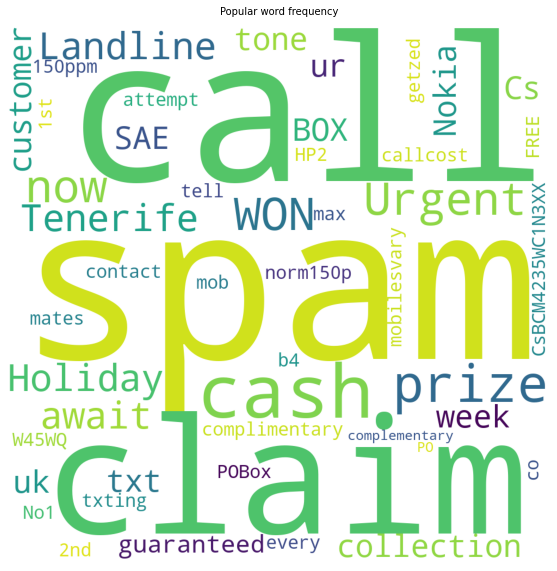

In [54]:
#printing the most common words in all messages
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud =WordCloud(background_color = 'White', width = 1000, height = 1000, max_words = 50).generate(str(data['Text']))
plt.rcParams['figure.figsize'] = (10,10)
plt.title('Popular word frequency', fontsize = 10)
plt.axis('off')
plt.imshow(wordcloud)





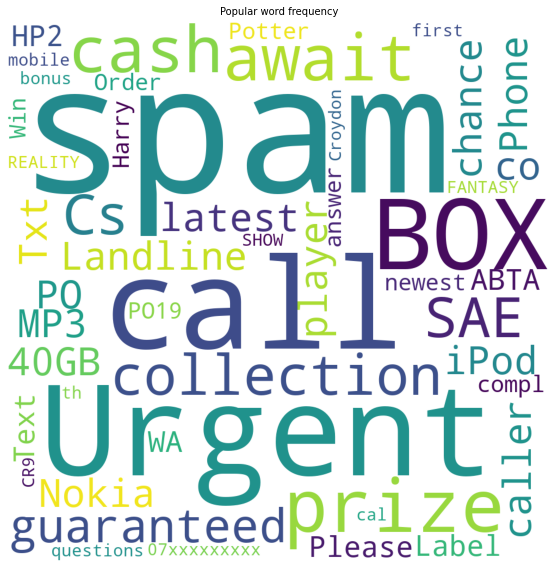

In [55]:
#printing most common spams in all messages

from wordcloud import WordCloud
import matplotlib.pyplot as plt


wordcloud =WordCloud(background_color = 'White', width = 1000, height = 1000, max_words = 50).generate(str([Spamfilter]))
plt.rcParams['figure.figsize'] = (10,10)
plt.title('Popular word frequency', fontsize = 10)
plt.axis('off')
plt.imshow(wordcloud)





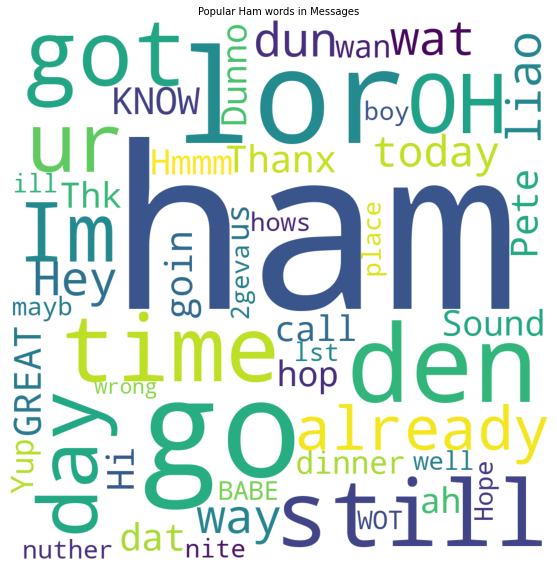

In [56]:
#printing most common hams in all messages

from wordcloud import WordCloud
import matplotlib.pyplot as plt


wordcloud =WordCloud(background_color = 'White', width = 1000, height = 1000, max_words = 50).generate(str([hamfilter]))
plt.rcParams['figure.figsize'] = (10,10)
plt.title('Popular Ham words in Messages', fontsize = 10)
plt.axis('off')
plt.imshow(wordcloud)






In [57]:
 
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv(data_file, sep=',', header=None, names=['Text','Label'] )
data.head()

data = data.rename(columns = {'v1': 'Text', 'v2': 'Label'})

data.columns

Index(['Text', 'Label'], dtype='object')

In [58]:
#Using Preprocessing to remove stopwords and filter out useless data from the messages
import re
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 1324):
    review = re.sub('[^a-zA-Z]', ' ',data['Text'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
  
  # stemming
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  
  # joining them back with space
    review = ' '.join(review)
    corpus.append(review)





[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [59]:
#convert words into tokens
#count the Number of Characters typed in message
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
x = cv.fit_transform(corpus).toarray()
y = data.iloc[:, 0]

print(x.shape)
print(y.shape)



(1324, 579)
(1324,)


In [60]:
#split the dataset for training purposes 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(993, 579)
(331, 579)
(993,)
(331,)


In [61]:
#perform the standardization
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [62]:
!pip install pandas_confusion


In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from pandas_confusion import ConfusionMatrix
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
model = RandomForestClassifier()  
#model.fit(x_train,y_train)
y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Confusionmatrix = ConfusionMatrix (y_test, y_pred)
print("Confusion matrix:\n%S"% Confusionmatrix)


Confusionmatrix.plot()

NotFittedError: ignored

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from pandas_confusion import ConfusionMatrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

model = RandomForestClassifier()  
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Confusionmatrix = ConfusionMatrix (y_test, y_pred)
print("Confusion matrix:\n%s"% Confusionmatrix)


Confusionmatrix.plot()